In [1]:
import datetime
from pandas import offsets
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
import re
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, EasterMonday, Easter
from pandas.tseries.offsets import Day, DateOffset, CustomBusinessDay,CustomBusinessMonthEnd, BusinessDay


In [2]:
df1 = pd.read_csv('data-20191112T1252-structure-20191112T1247.csv')
# df1

In [3]:
# for i in (df1[df1.columns[1]][0]):
    
# df1[df1.columns[1]][0]

In [4]:
df = pd.read_csv('data-20191112T1252-structure-20191112T1247.csv',
                usecols=[i for i in range(13)], index_col=0)
df


,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
Год/Месяц,,,,,,,,,,,,
1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31"
2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30"
2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*"
2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*"
2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31"
2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31"
2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31"


In [5]:
df.applymap(lambda x: x.split(','))
df.columns = np.arange(1,13)
df

,1,2,3,4,5,6,7,8,9,10,11,12
Год/Месяц,,,,,,,,,,,,
1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31"
2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30"
2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*"
2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*"
2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31"
2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31"
2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31"


In [6]:

pre_hol= df.applymap(lambda x: [int(i[:-1]) for i in x.split(',') if i.endswith('*')])
pre_hol

,1,2,3,4,5,6,7,8,9,10,11,12
Год/Месяц,,,,,,,,,,,,
1999,[6],[],[],[30],[],[11],[],[],[],[],[],[31]
2000,[6],[],[7],[],[8],[],[],[],[],[],[],[11]
2001,[],[],[7],[30],[8],[11],[],[],[],[],[6],[]
2002,[],[22],[7],[30],[8],[11],[],[],[],[],[6],"[11, 31]"
2003,[5],[],[7],[30],[8],[11],[],[],[],[],[6],"[11, 31]"
2004,[6],[],[],[30],[],[11],[],[],[],[],[],[31]
2005,[],[22],[5],[],[],[],[],[],[],[],[3],[]
2006,[],[22],[7],[],[6],[],[],[],[],[],[3],[]
2007,[],[22],[7],[28],[8],[9],[],[],[],[],[],[29]


# Создаю 3 Датафрейма: с предпраздничными днями, с выходными/праздниками и с смещенными праздниками

In [7]:
pre_hol= df.applymap(lambda x: [int(i[:-1]) for i in x.split(',') if i.endswith('*')])
shifted_hol= df.applymap(lambda x: [int(i[:-1]) for i in x.split(',') if i.endswith('+')])
hol_weekends = df.applymap(lambda x: [int(i) for i in x.split(',') 
                                      if not i.endswith('*') and not i.endswith('+')])
hol_weekends

,1,2,3,4,5,6,7,8,9,10,11,12
Год/Месяц,,,,,,,,,,,,
1999,"[1, 2, 3, 4, 7, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 13, 14, 20, 21, 27, 28]","[6, 7, 8, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 24, 25]","[1, 2, 3, 4, 8, 9, 10, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 14, 19, 20, 26, 27]","[3, 4, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[4, 5, 11, 12, 18, 19, 25, 26]","[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 8, 13, 14, 20, 21, 27, 28]","[4, 5, 11, 12, 13, 18, 19, 25, 26]"
2000,"[1, 2, 3, 4, 7, 8, 9, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 19, 20, 26, 27]","[4, 5, 8, 11, 12, 18, 19, 25, 26]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[1, 2, 6, 7, 9, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 12, 17, 18, 24, 25]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 16, 17, 23, 24, 30]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[4, 5, 7, 11, 12, 18, 19, 25, 26]","[2, 3, 9, 10, 12, 16, 17, 23, 24, 30, 31]"
2001,"[1, 2, 6, 7, 8, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 24, 25]","[3, 4, 8, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[1, 2, 5, 6, 9, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 12, 16, 17, 23, 24, 30]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[4, 5, 11, 12, 18, 19, 25, 26]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[6, 7, 13, 14, 20, 21, 27, 28]","[3, 4, 7, 10, 11, 17, 18, 24, 25]","[1, 2, 8, 9, 12, 15, 16, 22, 23, 29, 30]"
2002,"[1, 2, 5, 6, 7, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 16, 17, 23, 24, 25]","[2, 3, 8, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 13, 14, 20, 21, 28]","[1, 2, 3, 4, 5, 9, 10, 11, 12, 19, 25, 26]","[1, 2, 8, 9, 12, 15, 16, 22, 23, 29, 30]","[6, 7, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[5, 6, 12, 13, 19, 20, 26, 27]","[2, 3, 7, 8, 9, 16, 17, 23, 24, 30]","[1, 7, 8, 12, 13, 14, 21, 22, 28, 29]"
2003,"[1, 2, 3, 6, 7, 11, 12, 18, 19, 25, 26]","[1, 2, 8, 9, 15, 16, 22, 23, 24]","[1, 2, 8, 9, 10, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 19, 20, 26, 27]","[1, 2, 3, 4, 9, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 12, 13, 14, 15, 22, 28, 29]","[5, 6, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 13, 14, 20, 21, 27, 28]","[4, 5, 11, 12, 18, 19, 25, 26]","[1, 2, 7, 8, 9, 15, 16, 22, 23, 29, 30]","[6, 7, 12, 13, 14, 20, 21, 27, 28]"
2004,"[1, 2, 3, 4, 7, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 23, 28, 29]","[6, 7, 8, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 24, 25]","[1, 2, 3, 4, 8, 9, 10, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 14, 19, 20, 26, 27]","[3, 4, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[4, 5, 11, 12, 18, 19, 25, 26]","[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 8, 13, 14, 20, 21, 27, 28]","[4, 5, 11, 12, 13, 18, 19, 25, 26]"
2005,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 22, 23...","[5, 6, 12, 13, 19, 20, 23, 26, 27]","[6, 7, 8, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 16, 17, 23, 24, 30]","[1, 2, 7, 8, 9, 14, 15, 21, 22, 28, 29]","[4, 5, 11, 12, 13, 18, 19, 25, 26]","[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]","[6, 7, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 24, 25]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[4, 5, 6, 12, 13, 19, 20, 26, 27]","[3, 4, 10, 11, 17, 18, 24, 25, 31]"
2006,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 21, 22, 28...","[4, 5, 11, 12, 18, 19, 23, 24, 25]","[4, 5, 8, 11, 12, 18, 19, 25, 26]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[1, 7, 8, 9, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 12, 17, 18, 24, 25]","[1, 2, 8, 9, 15, 16, 22, 23, 29, 30]","[5, 6, 12, 13, 19, 20, 26, 27]","[2, 3, 9, 10, 16, 17, 23, 24, 30]","[1, 7, 8, 14, 15, 21, 22, 28, 29]","[4, 5, 6, 11, 12, 18, 19, 25, 26]","[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]"
2007,"[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 20, 21, 27, 28]","[3, 4, 10, 11, 17, 18, 23, 24, 25]","[3, 4, 8, 10, 11, 17, 18, 24, 25, 31]","[1, 7, 8, 14, 15, 21, 22, 29, 30]","[1, 5, 6, 9, 12, 13, 19, 20, 26, 27]","[2, 3, 10, 11, 12, 16, 17, 23, 24, 30]","[1

In [8]:
pre_h = list(filter(None, [pd.Timestamp(year, month, day)
                           if day is not None else None
                           for year in pre_hol.index
                           for month in pre_hol.columns
                           for day in pre_hol.loc[year][month]]))

shifted_h = [Holiday(name='Shifted_holiday', year=year, month=month, day=day)
        if day is not None else None
        for year in shifted_hol.index
        for month in shifted_hol.columns
        for day in shifted_hol.loc[year][month]]

w_hol = [Holiday(name='Weekend or Holiday', year=year, month=month, day=day)
        if day is not None else None
        for year in hol_weekends.index
        for month in hol_weekends.columns
        for day in hol_weekends.loc[year][month]]

rules = list(filter(None, [*w_hol, *shifted_h]))


In [9]:
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)
    rules = rules

russian_calendar = CustomBusinessDay(
    calendar=RussianBusinessCalendar())

business_month_ends = CustomBusinessMonthEnd(holidays=rules)
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                           calendar=RussianBusinessCalendar())
russian_holidays = pd.offsets


In [10]:
holiday_dates = [*['1999-01-0{}'.format(i) for i in range(1, 9)], '1999-02-23', '1999-03-08', '1999-05-01',
                 '1999-05-09', '1999-06-12', '1999-11-04']
official_holidays = [pd.date_range(start=d, end='2025-12-31',
                                   freq=DateOffset(years=1)) for d in holiday_dates]
official_holidays = list(chain(*official_holidays))
new_year_eves = pd.date_range(start='2000-12-31', end='2025-12-31',
                              freq=DateOffset(years=1))
bus_month_ends = pd.date_range(
    start='1999-01-01', end='2025-12-31', freq=business_month_ends)


In [11]:
monthes = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
           'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
weekdays = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
d_types = ['Выходной', 'Праздник', 'Предпраздничный рабочий день',
           'Последний день месяца', 'Последний рабочий день месяца']
cols = [*d_types, *weekdays, *monthes, 'Предновогодний выходной день']

ts = pd.DataFrame(columns=cols, index=pd.date_range(
    start='1999-01-01', end='2025-12-31', freq='D'))
ts = ts.fillna(0)


In [12]:
ts.loc[russian_calendar.holidays, ['Выходной']] = 1
ts.loc[official_holidays, ['Праздник']] = 1
ts.loc[official_holidays, ['Выходной']] = 1
ts.loc[new_year_eves, ['Предновогодний выходной день']] = 1
ts.loc[ts.index.is_month_end == True, ['Последний день месяца']] = 1
ts.loc[bus_month_ends, ['Последний рабочий день месяца']] = 1
ts.loc[pre_h, ['Предпраздничный рабочий день']] = 1


for i, v in enumerate(monthes):
    ts.loc[ts.index.month == i+1, [v]] = 1

for i, v in enumerate(weekdays):
    ts.loc[ts.index.dayofweek == i, [v]] = 1
ts


,Выходной,Праздник,Предпраздничный рабочий день,Последний день месяца,Последний рабочий день месяца,Пн,Вт,Ср,Чт,Пт,...,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
1999-01-01,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-01-02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-03,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-04,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-05,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


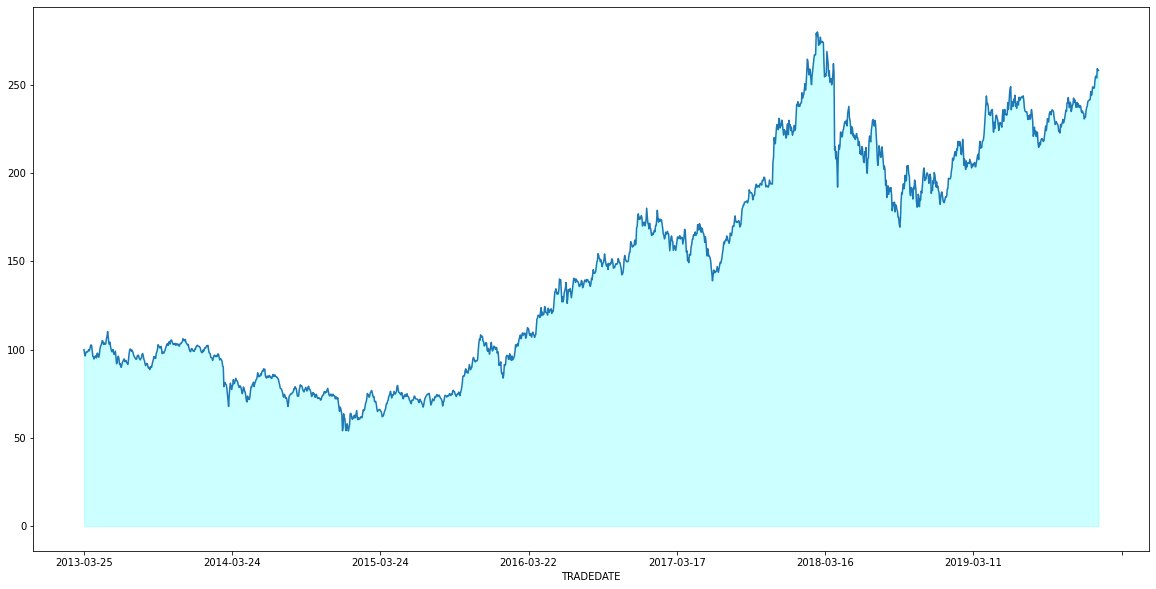

In [13]:
data = pd.read_csv('sber_stocks.csv',
                  index_col = 'TRADEDATE')
y1 = data['ADMITTEDQUOTE'].values
x = np.arange(len(data.index))

fig = plt.figure(figsize = (20,10))
ax = plt.gca()
data['ADMITTEDQUOTE'].plot(figsize = (20,10))
ax.fill_between(x,y1, 0, color = 'cyan', alpha = 0.2)

In [15]:
data3 = pd.read_csv('sber_stocks.csv')

index1 = pd.to_datetime(data3['TRADEDATE'], format = '%Y-%m-%d').values
data =data.reindex(index1)
# data.drop(data.columns[[2,13,14,18]], axis=1, inplace=True) 


<AxesSubplot:xlabel='TRADEDATE'>

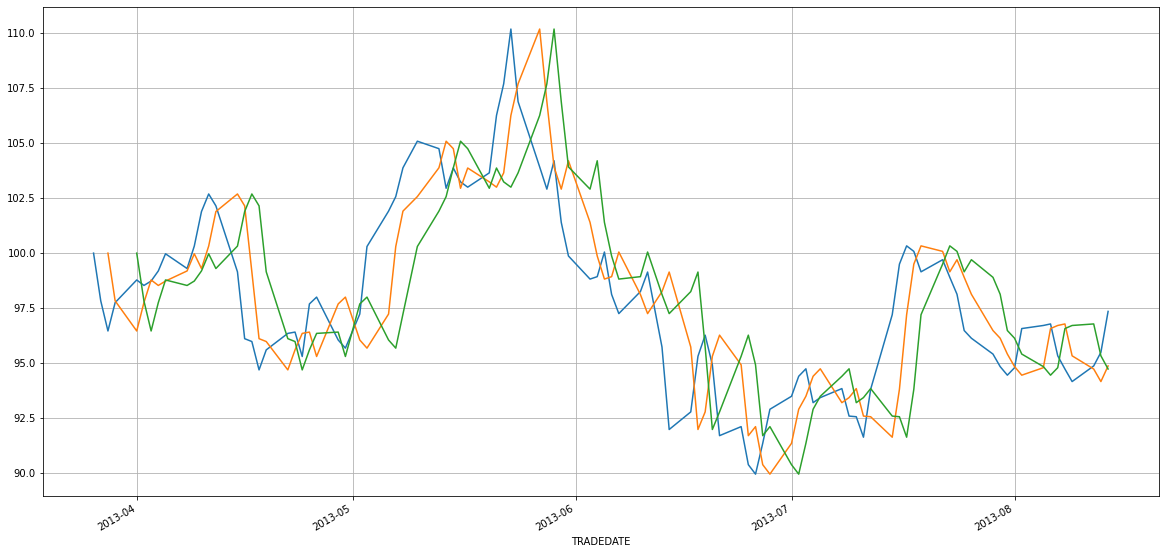

In [17]:
data_sh_1 = data['ADMITTEDQUOTE'].shift(1)
data_sh_3 = data['ADMITTEDQUOTE'].shift(3)
data_sh_5 = data['ADMITTEDQUOTE'].shift(5)
data_sh_1[:100].plot(figsize = (20,10), grid = True)
data_sh_3[:100].plot(figsize = (20,10), grid = True)
data_sh_5[:100].plot(figsize = (20,10), grid = True)



In [18]:
data_aq  = data['ADMITTEDQUOTE']
data_aq = data_aq.reindex(index1)
data_aq.rolling(window = 3).std()

TRADEDATE
2013-03-25         NaN
2013-03-26         NaN
2013-03-27    1.785002
2013-03-28    0.768917
2013-03-29    1.162426
                ...   
2020-01-03    1.630041
2020-01-06    0.576628
2020-01-08    2.768724
2020-01-09    2.757904
2020-01-10    0.620108
Name: ADMITTEDQUOTE, Length: 1712, dtype: float64

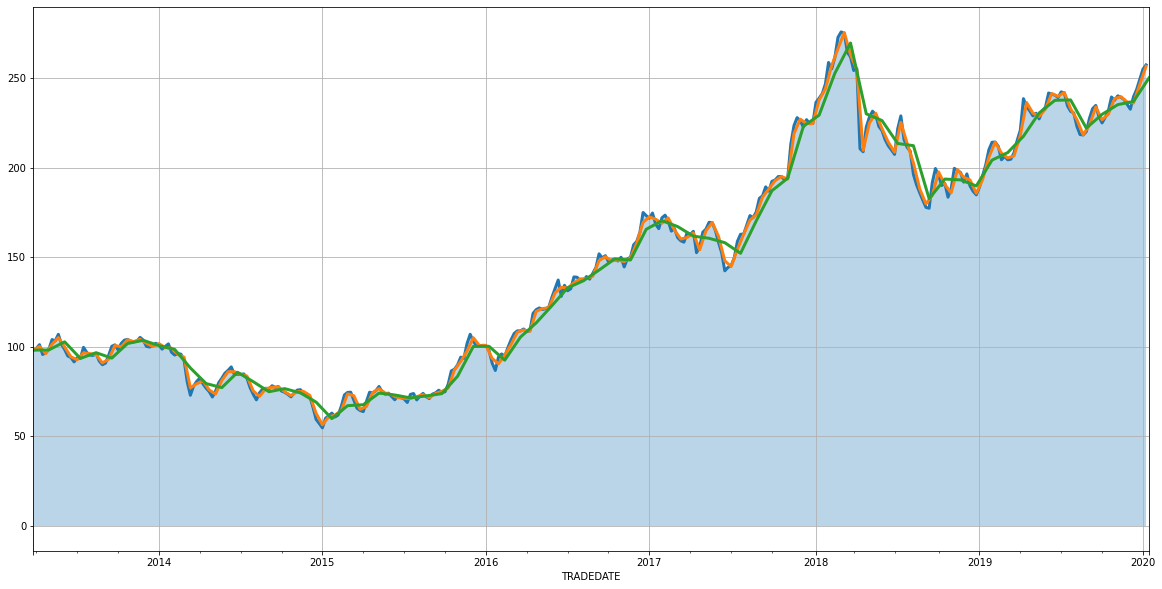

In [19]:

ax = data_aq.resample('W').mean().plot(figsize=(20, 10), linewidth=3, grid=True)
data_aq.resample('2W').mean().plot(figsize=(20, 10), linewidth=3, grid=True)
data_aq.resample('5W').mean().plot(figsize=(20, 10), linewidth=3, grid=True)
ax.fill_between(data_aq.resample('W').mean().index,  
                data_aq.resample('W').mean().values,
                0, alpha = 0.3)

<AxesSubplot:xlabel='TRADEDATE'>

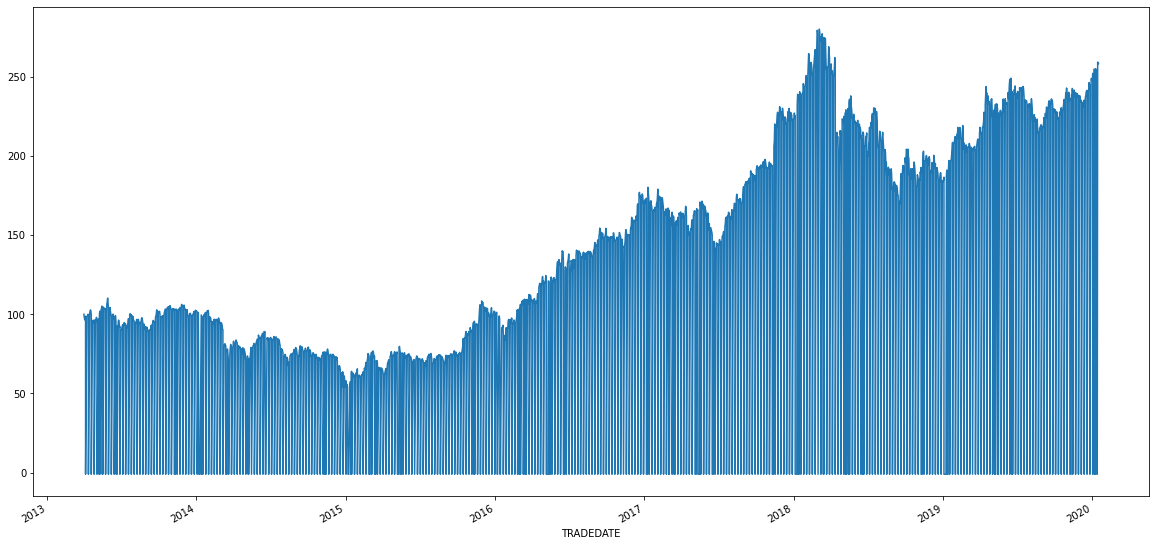

In [20]:
data_aq.asfreq('1D').fillna(-1).shift(5, freq = pd.offsets.BDay()).plot(figsize = (20,10))   # 5 лаг по рабочим дням, с выравниванием 

In [148]:
data_close = pd.read_csv('sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
data_close['WEEKDAY'] = data_close.index.weekday
data_close.merge(ts['Праздник'], left_index =True,right_index =True,how = 'inner')

data_close = data_close.merge(ts['Праздник'],left_index =True, right_index =True, how = 'inner')
data_close =data_close.merge(ts['Предпраздничный рабочий день'],left_index =True, right_index =True, how = 'inner')
data_close

,CLOSE,WEEKDAY,Праздник,Предпраздничный рабочий день
2013-03-25,98.79,0,0,0
2013-03-26,97.20,1,0,0
2013-03-27,96.75,2,0,0
2013-03-28,98.59,3,0,0
2013-03-29,98.76,4,0,0
...,...,...,...,...
2020-01-03,255.00,4,1,0
2020-01-06,253.90,0,1,0
2020-01-08,259.15,2,1,0
2020-01-09,257.99,3,0,0


In [150]:
df_result = pd.read_csv('sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
for i in range(1,6, 2):
    df_result['Лаговые переменные, глубина - {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).min().shift(1))
    df_result['Скользящая медиана {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).median().shift(1))
    df_result['Скользящее среднее значение {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).mean().shift(1))
    df_result['Скользящий минимум {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).min().shift(1))
    df_result['Скользящий максимум {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).max().shift(1))
    df_result['Скользящий std {}'.format(i)] = data_close.groupby('WEEKDAY')['CLOSE'].transform(
        lambda x: x.rolling(window=i).std().shift(1))
    df_result['среднее предпразничные дни {}'.format(i)] = data_close[data_close['Предпраздничный рабочий день'] == 1]['CLOSE'].transform(
        lambda x: x.expanding().mean().shift(1))
    df_result['медиана предпразничные дни {}'.format(i)] = data_close[data_close['Предпраздничный рабочий день'] == 1]['CLOSE'].transform(
        lambda x: x.expanding().median().shift(1))
    df_result['миниимум предпразничные дни {}'.format(i)] = data_close[data_close['Предпраздничный рабочий день'] == 1]['CLOSE'].transform(
        lambda x: x.expanding().mean().shift(1))
    df_result['максимум предпразничные дни {}'.format(i)] = data_close[data_close['Предпраздничный рабочий день'] == 1]['CLOSE'].transform(
        lambda x: x.expanding().mean().shift(1))
    df_result['std предпразничные дни {}'.format(i)] = data_close[data_close['Предпраздничный рабочий день'] == 1]['CLOSE'].transform(
        lambda x: x.expanding().mean().shift(1))
    
    
df_result['В расш. окне mean - праздничные дни'] = data_close[data_close['Праздник'] == 1].CLOSE.transform(
        lambda x: x.expanding().mean().shift(1))
df_result['В расш. окне median - праздничные дни'] = data_close[data_close['Праздник'] == 1].CLOSE.transform(
    lambda x: x.expanding().median().shift(1))
df_result['В расш. окне max - праздничные дни'] = data_close[data_close['Праздник'] == 1].CLOSE.transform(
    lambda x: x.expanding().max().shift(1))
df_result['В расш. окне min - праздничные дни'] = data_close[data_close['Праздник'] == 1].CLOSE.transform(
    lambda x: x.expanding().min().shift(1))
df_result['В расш. окне std - праздничные дни'] = data_close[data_close['Праздник'] == 1].CLOSE.transform(
    lambda x: x.expanding().std().shift(1))    
df_result.head(30)

,CLOSE,"Лаговые переменные, глубина - 1",Скользящая медиана 1,Скользящее среднее значение 1,Скользящий минимум 1,Скользящий максимум 1,Скользящий std 1,среднее предпразничные дни 1,медиана предпразничные дни 1,миниимум предпразничные дни 1,...,среднее предпразничные дни 5,медиана предпразничные дни 5,миниимум предпразничные дни 5,максимум предпразничные дни 5,std предпразничные дни 5,В расш. окне mean - праздничные дни,В расш. окне median - праздничные дни,В расш. окне max - праздничные дни,В расш. окне min - праздничные дни,В расш. окне std - праздничные дни
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,98.07,98.79,98.79,98.79,98.79,98.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,98.93,97.20,97.20,97.20,97.20,97.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03,99.59,96.75,96.75,96.75,96.75,96.75,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04,99.91,98.59,98.59,98.59,98.59,98.59,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
